In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

In [3]:
data = pd.read_csv('../Data/forGPT.csv')
# data_ian = pd.read_csv('../end_course_survey_subset.csv')
# combined_df = pd.merge(left=data, right=data_ian, on=['student_id'], how='inner')

# # Dropping rows where 'response' starts with '['
# df_filtered = combined_df[~combined_df['response'].str.startswith('[')]
# df_filtered

# df_filtered.to_csv('PROPACOMBINED.csv', index=False)

/tmp/ipykernel_3871/4249782613.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/forGPT.csv')


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'data' is your DataFrame
# Preprocessing
data['was_complete'] = data['was_complete'].astype(str).map({'True': 1, 'False': 0})
data['review_flag'] = data['review_flag'].astype(str).map({'True': 1, 'False': 0})

features = data[['chapter_number', 'Cost_Response', 'Expectancy_Response', 'Intrinsic_Value_Response',
                 'Utility_Value_Response', 'section_number', 'was_complete', 'tried_again_clicks',
                 'engaged', 'idle_brief', 'idle_long', 'off_page_brief', 'off_page_long', 'review_flag']]

target = data['f1_score']

# Handling missing values
imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=120, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2}')
print(f'RMSE: {rmse}')


R²: 0.6219622557006669
RMSE: 0.11375414123703718


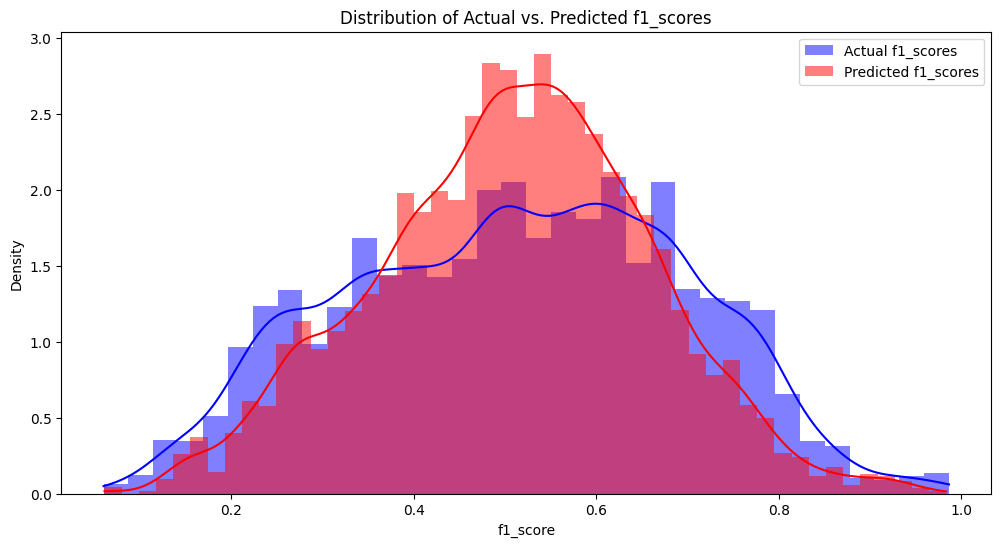

In [5]:
plt.figure(figsize=(12, 6))

sns.histplot(y_test, kde=True, stat="density", linewidth=0, color="blue", label="Actual f1_scores")
sns.histplot(y_pred, kde=True, stat="density", linewidth=0, color="red", label="Predicted f1_scores")

plt.legend()
plt.title('Distribution of Actual vs. Predicted f1_scores')
plt.show()



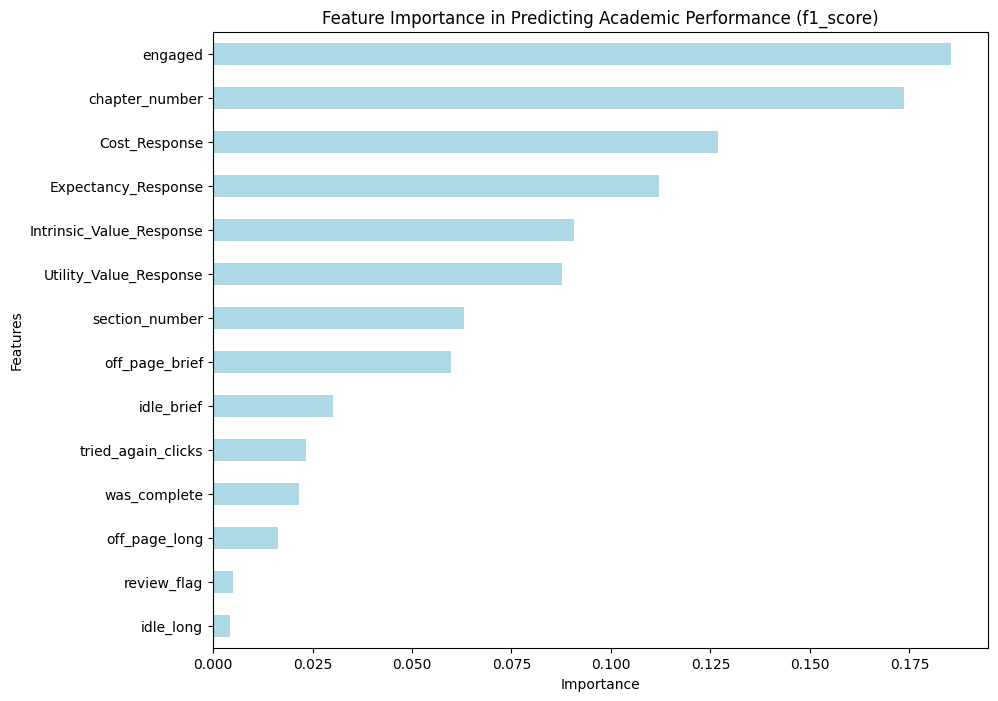

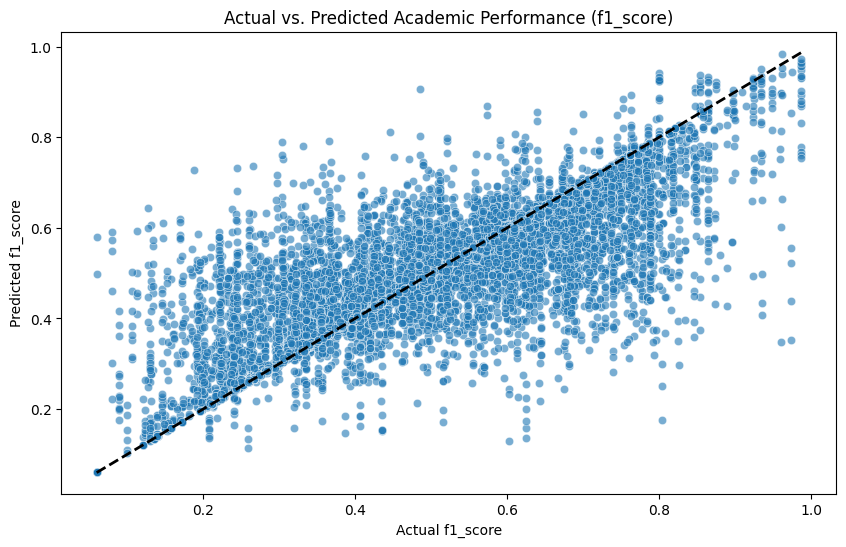

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feature_importances = model.feature_importances_
feature_names = features.columns
importances = pd.Series(feature_importances, index=feature_names)

plt.figure(figsize=(10, 8))
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightblue')
plt.title('Feature Importance in Predicting Academic Performance (f1_score)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Actual vs. Predicted Academic Performance (f1_score)')
plt.xlabel('Actual f1_score')
plt.ylabel('Predicted f1_score')
plt.show()


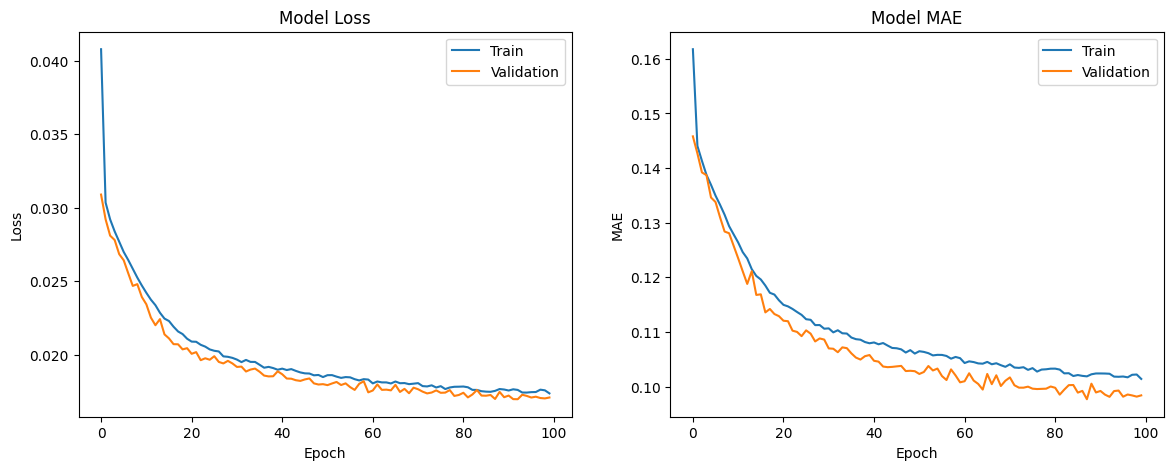

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train')
plt.plot(history.history['val_mean_absolute_error'], label='Validation')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.show()
